---
# <div align="center"> Machine Learning</div>
<div align="center"> Assignment 1 </div>


# Introduction

TBC

# Objective

TBC

# Problem Formulation

1. Do an EDA on the data set and observe the data<br>
<br>
2. Carry out supervised, multivariate regression<br>
<br>
3. Performance measures: R^2 (Reason TBC)


### Load the Data set and prepare for EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


healthDataFrame = pd.read_csv('./train_data.csv')
healthDataFrame.head()

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,4,New York City,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,5,New York City,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


Check to see if there are missing values

In [2]:
pd.isna(healthDataFrame).sum()

ID                              0
HealthServiceArea               0
Gender                          0
Race                            0
TypeOfAdmission                 0
CCSProcedureCode                0
APRSeverityOfIllnessCode        0
PaymentTypology                 0
BirthWeight                     0
EmergencyDepartmentIndicator    0
AverageCostInCounty             0
AverageChargesInCounty          0
AverageCostInFacility           0
AverageChargesInFacility        0
AverageIncomeInZipCode          0
LengthOfStay                    0
dtype: int64

# Perform EDA

In [3]:
healthDataFrame.describe()

,ID,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,29983.500000,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,17310.837458,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,1.000000,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,14992.250000,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,29983.500000,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,44974.750000,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,59966.000000,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


Drop the ID and Health service area because they can cause data leaks 

In [4]:
healthDataFrame = healthDataFrame.drop(['ID'], axis=1)
healthDataFrame = healthDataFrame.drop(['HealthServiceArea'], axis=1)


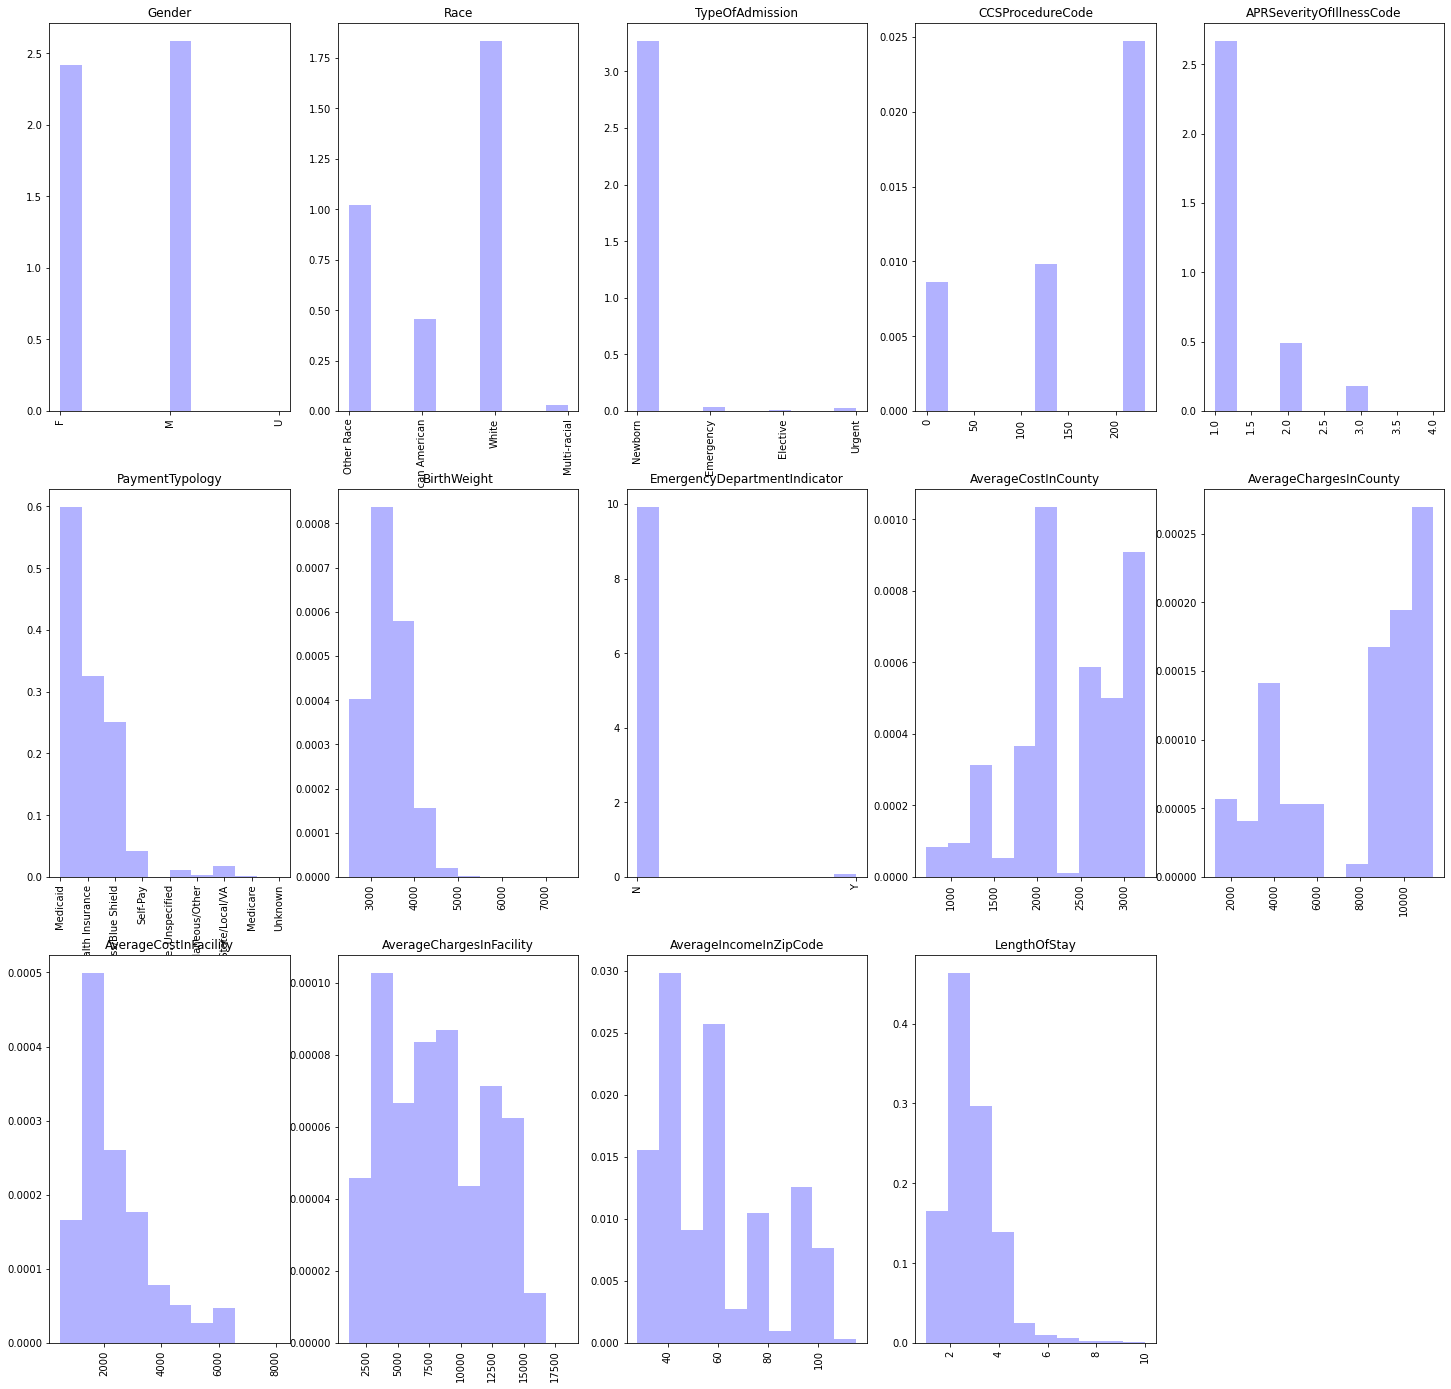

In [5]:
plt.figure(figsize=(25,50))
for i, col in enumerate(healthDataFrame.columns):
    plt.subplot(6,5,i+1)
    plt.hist(healthDataFrame[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

### Turn categorical data into numerical values

In [6]:
from sklearn.preprocessing import OneHotEncoder

# Race
OneHotEncoder_race = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_race.fit(healthDataFrame[['Race']])

onehot_ = OneHotEncoder_race.transform(healthDataFrame[['Race']]).toarray()

# print(onehot_.shape, OneHotEncoder_race.categories_)

#add them to the dataframe

colName = 'Race'
for i in range(len(OneHotEncoder_race.categories_[0])):
    healthDataFrame[colName + '_' + str(OneHotEncoder_race.categories_[0][i])] = onehot_[:,i]

# Drop the race column
healthDataFrame = healthDataFrame.drop(['Race'], axis=1)
healthDataFrame.head()


,Gender,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Race_Black/African American,Race_Multi-racial,Race_Other Race,Race_White
0,F,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1,0.0,0.0,1.0,0.0
1,M,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1,1.0,0.0,0.0,0.0
2,M,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1,0.0,0.0,1.0,0.0
3,F,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1,0.0,0.0,1.0,0.0
4,F,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1,0.0,0.0,1.0,0.0


In [7]:
# TypeOfAdmission
OneHotEncoder_admission = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_admission.fit(healthDataFrame[['TypeOfAdmission']])

onehot_ = OneHotEncoder_admission.transform(healthDataFrame[['TypeOfAdmission']]).toarray()


#add them to the dataframe

colName = 'TypeOfAdmission'
for i in range(len(OneHotEncoder_admission.categories_[0])):
    healthDataFrame[colName + '_' + str(OneHotEncoder_admission.categories_[0][i])] = onehot_[:,i]
healthDataFrame.head()

# Drop the admission column
healthDataFrame = healthDataFrame.drop(['TypeOfAdmission'], axis=1)


In [8]:
# PaymentTypology

OneHotEncoder_payment = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_payment.fit(healthDataFrame[['PaymentTypology']])

onehot_ = OneHotEncoder_payment.transform(healthDataFrame[['PaymentTypology']]).toarray()


#add them to the dataframe

colName = 'PaymentTypology'
for i in range(len(OneHotEncoder_payment.categories_[0])):
    healthDataFrame[colName + '_' + str(OneHotEncoder_payment.categories_[0][i])] = onehot_[:,i]
# healthDataFrame.head()

# Drop the payment column
healthDataFrame = healthDataFrame.drop(['PaymentTypology'], axis=1)
healthDataFrame.head()

,Gender,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,...,TypeOfAdmission_Urgent,PaymentTypology_Blue Cross/Blue Shield,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown
0,F,228,1,3700,N,2611,9227,1751,8951,45,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,M,228,1,2900,N,3242,8966,3338,6409,34,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,M,220,1,3200,N,3155,11381,4980,9323,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,F,0,1,3300,N,3155,11381,5826,15680,59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,F,228,1,2600,N,2611,9227,6000,14344,59,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# EmergencyDepartmentIndicator

OneHotEncoder_indicator = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_indicator.fit(healthDataFrame[['EmergencyDepartmentIndicator']])

onehot_ = OneHotEncoder_indicator.transform(healthDataFrame[['EmergencyDepartmentIndicator']]).toarray()


#add them to the dataframe

colName = 'EmergencyDepartmentIndicator'
for i in range(len(OneHotEncoder_indicator.categories_[0])):
    healthDataFrame[colName + '_' + str(OneHotEncoder_indicator.categories_[0][i])] = onehot_[:,i]
# healthDataFrame.head()

# Drop the payment column
healthDataFrame = healthDataFrame.drop(['EmergencyDepartmentIndicator'], axis=1)
healthDataFrame.head()

,Gender,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,...,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown,EmergencyDepartmentIndicator_N,EmergencyDepartmentIndicator_Y
0,F,228,1,3700,2611,9227,1751,8951,45,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,M,228,1,2900,3242,8966,3338,6409,34,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,M,220,1,3200,3155,11381,4980,9323,45,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,F,0,1,3300,3155,11381,5826,15680,59,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,F,228,1,2600,2611,9227,6000,14344,59,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
# Gender

OneHotEncoder_gender = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_gender.fit(healthDataFrame[['Gender']])

onehot_ = OneHotEncoder_gender.transform(healthDataFrame[['Gender']]).toarray()


#add them to the dataframe

colName = 'Gender'
for i in range(len(OneHotEncoder_gender.categories_[0])):
    healthDataFrame[colName + '_' + str(OneHotEncoder_gender.categories_[0][i])] = onehot_[:,i]
# healthDataFrame.head()

# Drop the payment column
healthDataFrame = healthDataFrame.drop(['Gender'], axis=1)
healthDataFrame.head()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Race_Black/African American,...,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown,EmergencyDepartmentIndicator_N,EmergencyDepartmentIndicator_Y,Gender_F,Gender_M,Gender_U
0,228,1,3700,2611,9227,1751,8951,45,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,228,1,2900,3242,8966,3338,6409,34,1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,220,1,3200,3155,11381,4980,9323,45,1,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,1,3300,3155,11381,5826,15680,59,1,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,228,1,2600,2611,9227,6000,14344,59,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Sepreating target and the attributes 

In [11]:
healthDataFrame_x = healthDataFrame.drop(['LengthOfStay'], axis=1)
healthDataFrame_y = healthDataFrame['LengthOfStay']

## change THIS
Cross-validation to generate simulated unseen data. 
Again we need to separate some test data - for final evaluation.

Cross-validation is usually the preferred method because it gives your model the opportunity to train on multiple train-test splits. This gives you a better indication of how well your model will perform on unseen data. Hold-out, on the other hand, is dependent on just one train-test split

In [18]:
from sklearn.model_selection import train_test_split

healthDataFrame_x_train, healthDataFrame_x_test, healthDataFrame_y_train, healthDataFrame_y_test = train_test_split(healthDataFrame_x, healthDataFrame_y, test_size=0.2, shuffle=True)      


In [14]:
# train_X = train_data.drop(['LengthOfStay',], axis=1).to_numpy()
# train_y = train_data[['LengthOfStay']].to_numpy()

# test_X = test_data.drop(['LengthOfStay',], axis=1).to_numpy()
# test_y = test_data[['LengthOfStay']].to_numpy()

## Feature Scalling

In [15]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

logNorm_attributes = ['CCSProcedureCode','APRSeverityOfIllnessCode','BirthWeight','AverageCostInCounty','AverageChargesInCounty',
                      'AverageCostInFacility', 'AverageChargesInFacility', 'AverageIncomeInZipCode']

minmax_attributes = list(set(healthDataFrame_x.columns).difference(set(logNorm_attributes)))

healthDataFrame_x_train_scaled = healthDataFrame_x_train.copy()
healthDataFrame_x_test_scaled = healthDataFrame_x_test.copy()

minmaxscaler = MinMaxScaler().fit(healthDataFrame_x_train_scaled.loc[:, minmax_attributes])
healthDataFrame_x_train_scaled.loc[:, minmax_attributes] = minmaxscaler.transform(healthDataFrame_x_train_scaled.loc[:, minmax_attributes])
healthDataFrame_x_test_scaled.loc[:, minmax_attributes] = minmaxscaler.transform(healthDataFrame_x_test_scaled.loc[:, minmax_attributes])

powertransformer = PowerTransformer(method='yeo-johnson', standardize=False).fit(healthDataFrame_x_train.loc[:, logNorm_attributes])
healthDataFrame_x_train_scaled.loc[:, logNorm_attributes] = powertransformer.transform(healthDataFrame_x_train_scaled.loc[:, logNorm_attributes])
healthDataFrame_x_test_scaled.loc[:, logNorm_attributes] = powertransformer.transform(healthDataFrame_x_test_scaled.loc[:, logNorm_attributes])

minmaxscaler_pt = MinMaxScaler().fit(healthDataFrame_x_train_scaled.loc[:, logNorm_attributes])
healthDataFrame_x_train_scaled.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(healthDataFrame_x_train_scaled.loc[:, logNorm_attributes])
healthDataFrame_x_test_scaled.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(healthDataFrame_x_test_scaled.loc[:, logNorm_attributes])

C:\Users\seana\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [ ]:
plt.figure(figsize=(30,30))
for i, col in enumerate(healthDataFrame_x_train_scaled.columns):
    plt.subplot(6,5,i+1)
    plt.hist(healthDataFrame_x_train_scaled[col], alpha=0.3, color='b', density=True)
    plt.hist(healthDataFrame_x_test_scaled[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

## Feature importance

In [21]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
model = linear_model.LinearRegression()
model.fit(healthDataFrame_x_train_scaled, healthDataFrame_y_train)

LinearRegression()

Correlation of features are checked using a heatmap

In [ ]:
# plt.figure(figsize=(30, 30))
# sns.heatmap(
#     healthDataFrame.corr(), 
#     annot= True, 
#     lineWidth = 0.5,
#     cmap=sns.diverging_palette(20, 220, n=200),
#      )

In [ ]:
healthDataFrame_y.hist(figsize=(5,5), alpha=0.3, color = 'b', density = True, bins=10)
plt.xlabel('LengthOfStay')
plt.ylabel('frequency')
plt.show()

## K Fold Cross Validation

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(healthDataFrame_x_train, healthDataFrame_y_train)
lr.score(healthDataFrame_x_test, healthDataFrame_y_test)

In [ ]:
from sklearn.svm import SVC
svm  =SVC()
svm.fit(healthDataFrame_x_train, healthDataFrame_y_train)
svm.score(healthDataFrame_x_test, healthDataFrame_y_test)

In [ ]:

rf = RandomForestClassifier(n_estimators=40)
rf.fit(healthDataFrame_x_train, healthDataFrame_y_train)
rf.score(healthDataFrame_x_test, healthDataFrame_y_test)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
ax = sns.boxplot(x='LengthOfStay',y='APRSeverityOfIllnessCode',data=healthDataFrame)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('LengthOfStay')

plt.xticks(rotation='vertical')
plt.show()

# Decision Trees Random Forests


Decision Trees are pretty good at finding the most important features, they consider all features and create a split on the one that is separating class labels the best (in terms of entropy).

If you use Random Forests it's even better, because some implementations (like scikit-learn's) are capable of sampling the features and use only a subset of it. Also in general Random Forests are more robust than decision trees.

If you want, you can compute Information Gain before using a Decision Tree to see how much information a particular feature contains regarding the Label:

In [ ]:
N, m = X_train.shape
num_trees = 10

clfs = list()
col_indexs = list()
val_acc_hold = list()
for i in range(0,num_trees):
    data_index = np.random.choice(N, N, replace=True)
    col_index = np.random.choice(m, np.floor(m/2).astype(np.int), replace=False)

    X_train1 = X_train[data_index, :][:, col_index]

    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
    clf = clf.fit(X_train1, y_train[data_index].ravel())
    
    clfs.append(clf)
    col_indexs.append(col_index)

    X_val1 = X_val[:, col_index]

    train_acc, val_acc = get_acc_scores(clf, X_train1, y_train[data_index].ravel(), X_val1, y_val)
    print("Validation Accuracy score: {:.3f}".format(val_acc))
    val_acc_hold.append(val_acc)